In [1]:
import os

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from scipy import stats

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter)
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from matplotlib import gridspec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

print("Package is ready.")

Package is ready.


In [2]:
plt.rcParams['figure.figsize'] = ((8/2.54), (6/2.54))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams.update({'font.size': 11})
MARKER_SIZE = 15
cmap_m = ["#f4a6ad", "#f6957e", "#fccfa2", "#8de7be", "#86d6f2", "#24a9e4", "#b586e0", "#d7f293"]
cmap = ["#e94d5b", "#ef4d28", "#f9a54f", "#25b575", "#1bb1e7", "#1477a2", "#a662e5", "#c2f442"]

plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

In [3]:
SW2_df = pd.read_csv('./results/SW2_greenhouse.csv', index_col='Unnamed: 0')
SW2_df.index = pd.DatetimeIndex(SW2_df.index)

In [4]:
SW2_df = SW2_df.loc['2020-03-05 00:00:00': '2020-07-03 23:59:00']

## Loadcell weight

### rockwool weight

In [5]:
rockwool_slab = np.array([626, 708, 650, 642])

In [6]:
rockwool_cube = np.array([48, 46, 50, 48, 46])

In [7]:
rockwool = (rockwool_slab + rockwool_cube.mean()*4)/1000

In [8]:
rockwool_mean = rockwool.mean()
print(rockwool_mean)

0.8469


In [9]:
rockwool.std()

0.030963688410782057

### rockwool slab weight

### root weight

In [10]:
roots_DW = np.array([301.25, 293.55, 315.15, 356.45, 341.55, 267.65, 303.55, 231.05, 253.05, 272.35, 334.35])/1000

In [11]:
roots_DW_mean = roots_DW.mean()
print(roots_DW_mean)

0.29726818181818176


In [12]:
roots_DW.std()

0.037008078188953145

### water weight

In [13]:
substrate_volume = (120*12*7.5 + 10*10*6.5*4)/1000

In [14]:
water_w_df = substrate_volume*SW2_df['subs_VWC']/100

In [15]:
SW2_df['water'] = water_w_df

In [16]:
SW2_df = SW2_df.interpolate()

In [17]:
SW2_df.head()

,temp,hum,rad,subs_VWC,subs_EC,subs_bulk_EC,subs_temp,permit,loadcell_1,loadcell_2,loadcell_3,water
2020-03-05 00:00:00,25.7000,23.275,-0.851,66.38,2.28,1.13,23.5,43.22,12.32,12.53,12.0,8.89492
2020-03-05 00:01:00,25.6875,23.325,-0.851,66.39,2.30,1.14,23.5,43.24,12.32,12.53,12.0,8.89626
2020-03-05 00:02:00,25.6125,23.525,0.000,66.32,2.29,1.13,23.5,43.16,12.32,12.53,12.0,8.88688
2020-03-05 00:03:00,25.6000,23.450,0.000,66.33,2.29,1.13,23.5,43.18,12.32,12.53,12.0,8.88822
2020-03-05 00:04:00,25.5000,23.550,0.000,66.41,2.29,1.13,23.5,43.25,12.33,12.52,12.0,8.89894


In [18]:
SW2_df.loc[:, 'loadcell_1'] = SW2_df.loc[:, 'loadcell_1'] - rockwool_mean
SW2_df.loc[:, 'loadcell_2'] = SW2_df.loc[:, 'loadcell_2'] - rockwool_mean
SW2_df.loc[:, 'loadcell_3'] = SW2_df.loc[:, 'loadcell_3'] - rockwool_mean

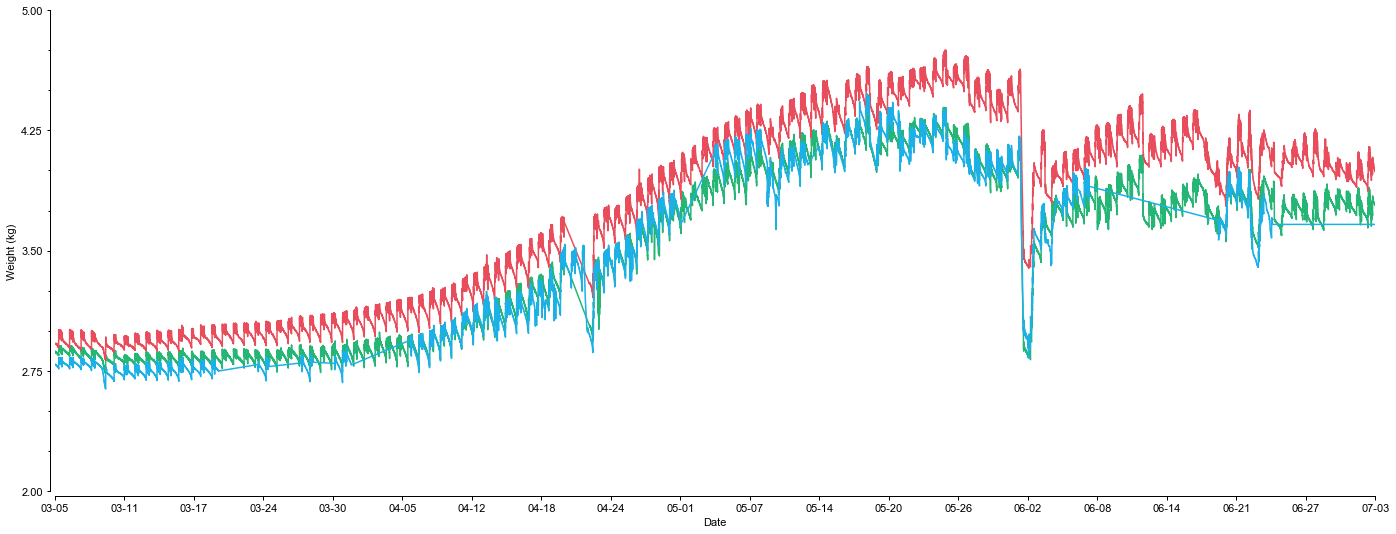

In [19]:
fig = plt.figure(figsize=((8/2.54*6.2), (6/2.54*3.2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(SW2_df.index, SW2_df['loadcell_1']/4, c=cmap[3])
ax0.plot(SW2_df.index, SW2_df['loadcell_2']/4, c=cmap[0])
ax0.plot(SW2_df.index, SW2_df['loadcell_3']/4, c=cmap[4])

ax0.set_xbound(SW2_df.index.min(), SW2_df.index.max())
# ax0.set_xbound(pd.Timestamp('2020-04-20 00:00:00'), pd.Timestamp('2020-04-23 23:59:00'))
ax0.xaxis.set_major_locator(LinearLocator(20))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_minor_locator(LinearLocator(13))
ax0.set_ybound(2, 5)

ax0.set_xlabel('Date')
ax0.set_ylabel('Weight (kg)')

ax0.set_rasterized(True)
fig.tight_layout()
plt.show() 

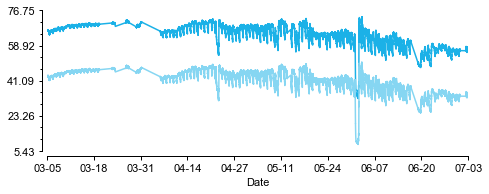

In [20]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(SW2_df.index, SW2_df['subs_VWC'], c=cmap[4])
ax0.plot(SW2_df.index, SW2_df['permit'], c=cmap_m[4])

ax0.set_xbound(SW2_df.index.min(), SW2_df.index.max())
# ax0.set_xbound('2020-03-19 20:00:00', '2020-03-20 03:59:00')
ax0.xaxis.set_major_locator(LinearLocator(10))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_minor_locator(LinearLocator(13))
#ax0.set_ybound(2, 5)

ax0.set_xlabel('Date')

fig.tight_layout()
fig.savefig('./figures/Fig_test.svg', transparent=True, format='svg')
plt.show() 

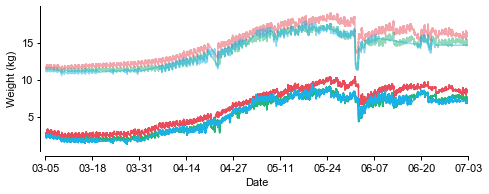

In [21]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(SW2_df.index, SW2_df['loadcell_1'], c=cmap[3], alpha=0.5)
ax0.plot(SW2_df.index, SW2_df['loadcell_2'], c=cmap[0], alpha=0.5)
ax0.plot(SW2_df.index, SW2_df['loadcell_3'], c=cmap[4], alpha=0.5)

ax0.plot(SW2_df.index, SW2_df['loadcell_1'] - SW2_df['water'], c=cmap[3])
ax0.plot(SW2_df.index, SW2_df['loadcell_2'] - SW2_df['water'], c=cmap[0])
ax0.plot(SW2_df.index, SW2_df['loadcell_3'] - SW2_df['water'], c=cmap[4])

ax0.set_xbound(SW2_df.index.min(), SW2_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(10))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# ax0.yaxis.set_major_locator(LinearLocator(5))
# ax0.yaxis.set_minor_locator(LinearLocator(13))
# ax0.set_ybound(2, 5)

ax0.set_xlabel('Date')
ax0.set_ylabel('Weight (kg)')

fig.tight_layout()
plt.show() 

## Destructive weight

In [22]:
weight_df = pd.read_csv('./results/weight.csv', index_col='Unnamed: 0')

In [23]:
weight_df.index = pd.DatetimeIndex(weight_df.index)

In [24]:
weight_df.index = np.append(weight_df.index[:-20], pd.DatetimeIndex(['2020-07-03']*20))

In [25]:
wweight_df = weight_df[['Stem FW', 'Leaf FW', 'petiole FW', 'Idv fruit FW']].sum(axis=1)

In [26]:
rs_ratio_df = pd.DataFrame([0.23255813953488372, 0.14789272030651343, 0.11954022988505748, 0.13678160919540233, 0.2835814088817321], index=weight_df.index.unique(), columns=['RS_ratio'])
DW_sum_df = weight_df[[col for col in weight_df.columns if col.endswith('DW')]].sum(axis=1).groupby(weight_df.index).mean()

In [27]:
roots_df = (DW_sum_df.T * rs_ratio_df.T).T
roots_df.columns = ['root DW']
roots_df['root FW'] = roots_df['root DW']/0.1325
roots_df.index = pd.DatetimeIndex(roots_df.index)

In [28]:
wweight_wr_df = wweight_df.add(roots_df['root FW'])

In [29]:
night_df = SW2_df.loc[SW2_df['rad'] <= 0.2, 'loadcell_1':'loadcell_3']

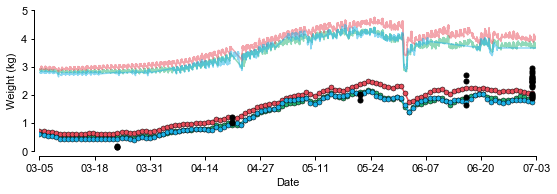

In [30]:
fig = plt.figure(figsize=((8/2.54*2.5), (6/2.54*1.2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(SW2_df.index, SW2_df['loadcell_1']/4, c=cmap[3], alpha=0.5)
ax0.plot(SW2_df.index, SW2_df['loadcell_2']/4, c=cmap[0], alpha=0.5)
ax0.plot(SW2_df.index, SW2_df['loadcell_3']/4, c=cmap[4], alpha=0.5)

# ax0.plot(SW2_df.index, (SW2_df['loadcell_1'] - SW2_df['water'])/4, c=cmap[3])
# ax0.plot(SW2_df.index, (SW2_df['loadcell_2'] - SW2_df['water'])/4, c=cmap[0])
# ax0.plot(SW2_df.index, (SW2_df['loadcell_3'] - SW2_df['water'])/4, c=cmap[4])

ax0.plot(night_df.resample('1d').mean().index, ((night_df.resample('1d').mean()['loadcell_1'] - SW2_df['water'].resample('1d').mean())/4), '-o', ms=5, mec='k', mew=0.5, c=cmap[3])
ax0.plot(night_df.resample('1d').mean().index, ((night_df.resample('1d').mean()['loadcell_2'] - SW2_df['water'].resample('1d').mean())/4), '-o', ms=5, mec='k', mew=0.5, c=cmap[0])
ax0.plot(night_df.resample('1d').mean().index, ((night_df.resample('1d').mean()['loadcell_3'] - SW2_df['water'].resample('1d').mean())/4), '-o', ms=5, mec='k', mew=0.5, c=cmap[4])

# ax0.plot(wweight_df.index, wweight_df/1000, 'o', c='k')
ax0.plot(wweight_df.index, wweight_wr_df/1000, 'o', ms=5, c='k')

ax0.set_xbound(SW2_df.index.min(), SW2_df.index.max())
# ax0.set_xbound('2020-03-05 14:40:00', '2020-03-09 23:59:00')
ax0.xaxis.set_major_locator(LinearLocator(10))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(6))
# ax0.yaxis.set_minor_locator(LinearLocator(13))
ax0.set_ybound(0, 5)

ax0.set_xlabel('Date')
ax0.set_ylabel('Weight (kg)')

fig.tight_layout()
fig.savefig('./figures/Fig_report.png', transparent=True, dpi=600,format='png')
plt.show()

In [ ]:
green_value = pd.read_csv('./results/green_pixels.csv', index_col=[0], header=None)
green_value2 = pd.read_csv('./results/green_pixels_lai2.csv', index_col=[0], header=None)

In [ ]:
LAI_OVER = [[pd.Timestamp('2020-03-11 15:50:00'),pd.Timestamp('2020-03-16 16:00:00')],
            [pd.Timestamp('2020-03-16 16:20:00'), pd.Timestamp('2020-03-23 13:20:00')],
            [pd.Timestamp('2020-03-23 14:00:00'), pd.Timestamp('2020-03-30 15:10:00')],
            [pd.Timestamp('2020-03-30 15:40:00'), pd.Timestamp('2020-04-06 13:20:00')],
            [pd.Timestamp('2020-04-06 13:50:00'), pd.Timestamp('2020-04-13 14:00:00')],
            [pd.Timestamp('2020-04-13 14:20:00'), pd.Timestamp('2020-04-22 12:50:00')],
            [pd.Timestamp('2020-04-28 10:10:00'), pd.Timestamp('2020-05-01 12:30:00')],
            [pd.Timestamp('2020-05-01 12:50:00'), pd.Timestamp('2020-05-04 11:10:00')],
            [pd.Timestamp('2020-05-04 11:30:00'), pd.Timestamp('2020-05-11 16:50:00')],
            [pd.Timestamp('2020-05-11 17:10:00'), pd.Timestamp('2020-05-18 11:50:00')],
            [pd.Timestamp('2020-05-18 12:00:00'), pd.Timestamp('2020-05-25 13:20:00')],
            [pd.Timestamp('2020-05-25 14:00:00'), pd.Timestamp('2020-06-01 15:40:00')],
            [pd.Timestamp('2020-06-10 15:30:00'), pd.Timestamp('2020-06-15 13:30:00')],
            [pd.Timestamp('2020-06-15 13:50:00'), pd.Timestamp('2020-06-22 11:50:00')],
            [pd.Timestamp('2020-06-22 12:10:00'), pd.Timestamp('2020-06-29 11:20:00')]
           ]

In [ ]:
LAI2_OVER = [[pd.Timestamp('2020-05-01 19:00:00'),pd.Timestamp('2020-05-04 11:00:00')],
             [pd.Timestamp('2020-05-04 11:30:00'),pd.Timestamp('2020-05-11 16:50:00')],
             [pd.Timestamp('2020-05-11 17:10:00'),pd.Timestamp('2020-05-18 11:50:00')],
             [pd.Timestamp('2020-05-18 12:00:00'),pd.Timestamp('2020-05-25 13:20:00')],
             [pd.Timestamp('2020-05-25 14:00:00'),pd.Timestamp('2020-06-01 15:40:00')],
             [pd.Timestamp('2020-06-01 16:20:00'),pd.Timestamp('2020-06-10 14:00:00')]
           ]

In [ ]:
lai_indices = pd.date_range(LAI_OVER[0][0], LAI_OVER[0][1], freq='10 min')
lai2_indices = pd.date_range(LAI2_OVER[0][0], LAI2_OVER[0][1], freq='10 min')
for _ in LAI_OVER[1:]:
    lai_indices = lai_indices.union(pd.date_range(_[0], _[1], freq='10 min'))
for _ in LAI2_OVER[1:]:
    lai2_indices = lai2_indices.union(pd.date_range(_[0], _[1], freq='10 min'))

In [ ]:
green_value = pd.DataFrame(data=green_value.values, index=lai_indices)
green_value.index = pd.DatetimeIndex(green_value.index)
green_value = green_value[green_value > 100].dropna()
green_value = green_value.reindex(pd.date_range('2020-03-05 00:00:00', '2020-07-03 23:59:00', freq='10 min'))

In [ ]:
green_value2 = pd.DataFrame(data=green_value2.values, index=lai2_indices)
green_value2.index = pd.DatetimeIndex(green_value2.index)
green_value2 = green_value2[green_value2 > 100].dropna()
green_value2 = green_value2.reindex(pd.date_range('2020-03-05 00:00:00', '2020-07-03 23:59:00', freq='10 min'))

In [ ]:
fig = plt.figure(figsize=((8/2.54*2.2), (6/2.54*1.7)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(green_value.resample('1d').mean().index, green_value.resample('1d').mean().values, '-o', mec='k', mew=0.5, c=cmap[3])

ax0.set_ylabel('# Pixels')
ax0.set_xlabel('Date (mm-dd)')
ax0.set_ybound(300000, 2600000)
ax0.set_xbound(green_value.index[0], green_value.index[-1])
ax0.xaxis.set_major_locator(LinearLocator(10))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax0.yaxis.set_major_locator(LinearLocator(10))

fig.tight_layout()
fig.savefig('./figures/Fig_for_report_4.svg', transparent=True, format='svg')
plt.show() 

In [ ]:
fig = plt.figure(figsize=((8/2.54), (6/2.54)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(green_value.index, green_value.values, c=cmap[3])

ax0.set_ylabel('# Pixels')
ax0.set_xlabel('Date (hh:mm)')
ax0.set_ybound(1550000, 3200000)
# ax0.set_xbound(green_value.index[0], green_value.index[-1])
ax0.set_xbound('2020-05-01 00:00:00', '2020-05-02 00:00:00')
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_major_locator(LinearLocator(5))

fig.tight_layout()
fig.savefig('./figures/Fig_for_report_5.svg', transparent=True, format='svg')
plt.show() 

In [ ]:
fig = plt.figure(figsize=((8/2.54), (6/2.54)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(green_value.index, green_value.values, c=cmap[3])

ax0.set_ylabel('# Pixels')
ax0.set_xlabel('Date (hh:mm)')
ax0.set_ybound(500000, 2000000)
# ax0.set_xbound(green_value.index[0], green_value.index[-1])
ax0.set_xbound('2020-04-01 00:00:00', '2020-04-02 00:00:00')
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax0.xaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_major_locator(LinearLocator(5))

fig.tight_layout()
fig.savefig('./figures/Fig_for_report_6.svg', transparent=True, format='svg')
plt.show() 

In [ ]:
SW2_df.loc[SW2_df['rad'] < 0, 'rad'] = 0

In [ ]:
env_mean = SW2_df.resample('1 d').mean()
env_mean = env_mean[['temp', 'hum', 'rad', 'subs_VWC', 'subs_EC', 'subs_bulk_EC', 'subs_temp', 'permit']]
env_max = SW2_df.resample('1 d').max()
env_max = env_max[['temp', 'hum', 'rad', 'subs_VWC', 'subs_EC', 'subs_bulk_EC', 'subs_temp', 'permit']]
env_max.columns = ['temp_max', 'hum_max', 'rad_max', 'subs_VWC_max', 'subs_EC_max', 'subs_bulk_EC_max', 'subs_temp_max', 'permit_max']
env_min = SW2_df.resample('1 d').min()
env_min = env_min[['temp', 'hum', 'rad', 'subs_VWC', 'subs_EC', 'subs_bulk_EC', 'subs_temp', 'permit']]
env_min.columns = ['temp_min', 'hum_min', 'rad_min', 'subs_VWC_min', 'subs_EC_min', 'subs_bulk_EC_min', 'subs_temp_min', 'permit_min']
env_sum = SW2_df.resample('1 d').sum()
env_sum = env_sum[['temp','hum', 'rad']]
env_sum.columns = ['temp_sum', 'hum_sum', 'rad_sum']

env_df = pd.concat([env_mean, env_max, env_min, env_sum], axis= 1)
avg_w_df = weight_df.groupby(weight_df.index).mean()
avg_w_df = avg_w_df.reindex(env_df.index).interpolate().dropna()
env_df = env_df.reindex(avg_w_df.index).interpolate()

In [ ]:
corr_df = pd.concat([env_df, avg_w_df], axis=1)
corr_df = corr_df.corr(method='pearson')[avg_w_df.columns]
corr_df = corr_df[['Stem FW', 'Leaf FW', 'petiole FW', 'Idv fruit FW', 'Stem DW', 'Leaf DW', 'petiole DW', 'Fruit DW', 'Fruit count', 'Plant height']]

In [ ]:
corr_df.columns

In [ ]:
gs = gridspec.GridSpec(4, 1)
fig = plt.figure(figsize=((8/2.54*1.7), (6/2.54*2)))
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

ax0.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Stem FW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[4])
ax1.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Leaf FW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[4])
ax2.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'petiole FW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[4])
ax3.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Idv fruit FW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[4])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 5))
ax3.spines['bottom'].set_position(('outward', 5))

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax0.yaxis.set_major_locator(LinearLocator(3))
ax0.yaxis.set_minor_locator(LinearLocator(11))
ax0.set_ybound(-1, 1)
ax1.yaxis.set_major_locator(LinearLocator(3))
ax1.yaxis.set_minor_locator(LinearLocator(11))
ax1.set_ybound(-1, 1)
ax2.yaxis.set_major_locator(LinearLocator(3))
ax2.yaxis.set_minor_locator(LinearLocator(11))
ax2.set_ybound(-1, 1)
ax3.yaxis.set_major_locator(LinearLocator(3))
ax3.yaxis.set_minor_locator(LinearLocator(11))
ax3.set_ybound(-1, 1)

ax0.set_ylabel('Correlation')

plt.xticks(rotation=90)

fig.tight_layout()
fig.savefig('./figures/Fig_for_report_1.svg', transparent=True, format='svg')
plt.show() 

In [ ]:
gs = gridspec.GridSpec(4, 1)
fig = plt.figure(figsize=((8/2.54*1.7), (6/2.54*2)))
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

ax0.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Stem DW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[0])
ax1.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Leaf DW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[0])
ax2.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'petiole DW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[0])
ax3.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Fruit DW'], 'o', mec='k', mew=0.5, ms=5, c=cmap[0])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_position(('outward', 5))
ax3.spines['bottom'].set_position(('outward', 5))

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax0.yaxis.set_major_locator(LinearLocator(3))
ax0.yaxis.set_minor_locator(LinearLocator(11))
ax0.set_ybound(-1, 1)
ax1.yaxis.set_major_locator(LinearLocator(3))
ax1.yaxis.set_minor_locator(LinearLocator(11))
ax1.set_ybound(-1, 1)
ax2.yaxis.set_major_locator(LinearLocator(3))
ax2.yaxis.set_minor_locator(LinearLocator(11))
ax2.set_ybound(-1, 1)
ax3.yaxis.set_major_locator(LinearLocator(3))
ax3.yaxis.set_minor_locator(LinearLocator(11))
ax3.set_ybound(-1, 1)

ax0.set_ylabel('Correlation')

plt.xticks(rotation=90)

fig.tight_layout()
fig.savefig('./figures/Fig_for_report_2.svg', transparent=True, format='svg')
plt.show() 

In [ ]:
gs = gridspec.GridSpec(2, 1)
fig = plt.figure(figsize=((8/2.54*1.7), (6/2.54*1.5)))
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Fruit count'], 'o', mec='k', mew=0.5, ms=5, c=cmap[3])
ax1.plot(corr_df.index[:27], corr_df.loc['temp':'rad_sum', 'Plant height'], 'o', mec='k', mew=0.5, ms=5, c=cmap[3])

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))

plt.setp(ax0.get_xticklabels(), visible=False)

ax0.yaxis.set_major_locator(LinearLocator(3))
ax0.yaxis.set_minor_locator(LinearLocator(11))
ax0.set_ybound(-1, 1)
ax1.yaxis.set_major_locator(LinearLocator(3))
ax1.yaxis.set_minor_locator(LinearLocator(11))
ax1.set_ybound(-1, 1)

ax0.set_ylabel('Correlation')

plt.xticks(rotation=90)

fig.tight_layout()
fig.savefig('./figures/Fig_for_report_3.svg', transparent=True, format='svg')
plt.show() 